# **Telcom Company Customer Churn Prediction**

#### Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified time frame.

#### *For instance, if you began the year with 500 customers but later ended with 480 customers, the customer churn rate would be 4%. This is the percentage of customers that left and stopped using the company's products.*

#### If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to create strategies for retention.


## **1.1 Business Understanding**

#### This project aims to predict the likelihood of a customer leaving the company. We will find the key indicators of churn as well as the retention strategies that can be implemented to avert this problem. 


##### **Problem Statement**: A telecommunications company intends to understand the lifetime value of each customer and know what factors affect the rate at which customers stop using their network. The company would like to build a model that predicts whether a customer will churn or not.

##### **Goal**: To build a machine learning model that predicts whether a customer will churn or not

#### *Hypothesis*

##### **Null Hypothesis**: There is no statistically significant relationship between contract type and customer churn 
##### **Alternative hypothesis**: There is a statistically significant relationship between contract type and customer churn

#### *Analytical Questions*
1. How do monthly charges and total charges impact customer churning?
2. How does tech support influence the likelihood of a customer to churn or not?
3. How does tenure impact customer churning?
4. How does internet service type impact churning?
5. How does the payment method impact churning?
6. How does contract type impact customer churning?
7. Which gender is churning at a higher rate?
8. Does having a partner affect churning?

#### Project Timeline
- Modeling - 1 week
- Strategy & business insights - 1 week

## **1.2 Data Understanding**

### **Import Packages**

In [162]:
# data analysis and manipulation packages
import pandas as pd 
import numpy as np 

import pyodbc    
from dotenv import dotenv_values
import pandas as pd
import warnings 

warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

from scipy.stats import chi2_contingency


# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

### **Data Loading**

#### Connect to the first dataset in an SQL server

In [50]:

# Fill in database credentials to connect
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'LP2_project'
password = 'Stat$AndD@t@Rul3'

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

# Connect to the database
connection = pyodbc.connect(connection_string)


In [51]:
# create query to connect to data set
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

#display first 3 rows
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


#### Load the second dataset, a CSV file

In [52]:
# Load the second data set

second_data = pd.read_csv("C:/Users/Zawadi/Desktop/Azubi/Customer-Churn-Prediction/Data/LP2_Telco-churn-second-2000.csv")

# Display first five rows of the data

second_data.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


### Load the third dataset, an XLSX file

In [53]:
# load the test data

test_data = pd.read_excel("C:/Users/Zawadi/Desktop/Azubi/Customer-Churn-Prediction/Data/Test_Data_Telco-churn-last-2000.xlsx")

test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### **Concatenate the First and Second Datasets to create the Training Data**

In [54]:
# concatenate the first and second datasets

training_data = pd.concat([data, second_data], ignore_index=True)

# check data
training_data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


### **Exploratory Data Analysis**

In [55]:
#View the info of the training data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [56]:
# view the info of the test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


Insights from this:
- There are 5043 entries in the training data and 2000 in the test data
- Some columns have missing values in training data
- There are no missing values in test data

In [57]:
# review the statistical information of the training data
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [58]:
# describe categorical columns
training_data.describe(include='O').T 

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,4774,5,False,1437
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,5,False,1478
OnlineBackup,4392,5,False,1320
DeviceProtection,4392,5,False,1296


Insights:
- The data is in different scales, so it has to be scaled

In [59]:
# review the statistical information of the test data
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2000.0,0.161500,0.368084,0.00,0.00,0.0,0.000,1.00
tenure,2000.0,31.853000,24.632677,0.00,8.00,27.0,55.000,72.00
MonthlyCharges,2000.0,63.933325,30.136858,18.25,34.25,69.8,89.275,118.75


Insights:
- Data is on different scales, needs scaling

In [60]:
# check for duplicates in training data
training_data.duplicated().sum()

0

In [61]:
# check for duplicates in test data
test_data.duplicated().sum()

0

-There are no duplicates in the data

In [62]:
# check for missing values in training data
training_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

- Multiple Lines, OnlineSecurity, OnlineBackup, Deviceprotection, TechSupport, StreamingTV, StreamingMovies, and Churn have missing values

In [63]:
# check for missing values in test data
test_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Key Insights:
- There no nulls in test data
- There are nulls in the training data
- ColumnID column is unnecessary for the model, it should be dropped
- Change TotalCharges type to numeric type from object

#### Data Cleaning

- Drop 'customerID' column since it is unnecessary

In [64]:
# Drop CustomerID column since it is unnecessary

training_data = training_data.drop('customerID', axis=1)
training_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


- Convert 'TotalCharges' to numeric dtype

In [65]:
# convert TotalCharges column to numeric
training_data['TotalCharges'] = pd.to_numeric(training_data['TotalCharges'], errors='coerce')
training_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [66]:
# Create a function to get the columns where False, True, Yes and No are present
def check_column_values(df):
    columns = []
    for column in df.columns:
        unique_values = df[column].astype(str).unique()  # Convert values to strings
        if all(value.lower() in [x.lower() for x in unique_values] for value in ['True', 'False', 'Yes', 'No']):
            columns.append(column)
    return columns
def filtered_target_columns(check_column_values):
    target_columns = check_column_values(training_data)
    return target_columns
target_columns = filtered_target_columns(check_column_values)
target_columns

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

- Clean columns with False/Trues and Yes/No to yes and no only

In [67]:
# Create a function that maps the column values and replaces True with Yes and False with No
def unify_column_values(df,columns):
    for column in columns:
        df[column]=df[column].replace({True:'Yes',False:'No'})
def unified_columns():
    return target_columns

unify_column_values(training_data,unified_columns())

In [68]:
# Create a function to print the unified columns and the number of values for each category
def get_clean_target_columns(df, target_columns):
    def clean_target_columns(column):
        return column
    result = {}
    for column in df.columns:
        if column in target_columns:
            column_values = df[column].value_counts()
            column_values.columns = [column, 'count']
            result[clean_target_columns(column)] = column_values
    for column, column_df in result.items():
        print(f"\nColumn: {column}")
        print(column_df)
get_clean_target_columns(training_data, target_columns)


Column: Partner
Partner
No     2585
Yes    2458
Name: count, dtype: int64

Column: Dependents
Dependents
No     3482
Yes    1561
Name: count, dtype: int64

Column: PhoneService
PhoneService
Yes    4554
No      489
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  2424
Yes                 2130
No phone service     220
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No                     2507
Yes                    1456
No internet service     429
Name: count, dtype: int64

Column: OnlineBackup
OnlineBackup
No                     2231
Yes                    1732
No internet service     429
Name: count, dtype: int64

Column: DeviceProtection
DeviceProtection
No                     2219
Yes                    1744
No internet service     429
Name: count, dtype: int64

Column: TechSupport
TechSupport
No                     2472
Yes                    1491
No internet service     429
Name: count, dtype: int64

Column: StreamingTV
StreamingT

In [69]:
# Function to change headers to lowercase
def data_columns_lower(data):
    data.columns = data.columns.str.lower()
    return data

- Change column names to lowercase

In [70]:

# Change training data columns to lowercase
data_columns_lower(training_data)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


#### Handling missing values

In [71]:
training_data.isna().sum()

gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          8
churn                 1
dtype: int64

- Replace missing values with most frequent for categorical columns and mean for numeric columns

In [72]:

# Define the columns with missing values
numerical_columns_with_null = ['tenure', 'monthlycharges', 'totalcharges']

# Instantiate SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data for numerical columns
training_data[numerical_columns_with_null] = imputer.fit_transform(training_data[numerical_columns_with_null])


In [73]:
class MostFrequentImputer(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        self.most_frequent_ = {col: X[col].mode()[0] for col in self.columns}
        return self

    def transform(self, X):
        X_filled = X.copy()
        for col, value in self.most_frequent_.items():
            X_filled[col].fillna(value, inplace=True)
        return X_filled

# Define columns with missing values
categorical_columns_with_null = ['multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'churn']

# Instantiate MostFrequentImputer
imputer = MostFrequentImputer(columns=categorical_columns_with_null)

# Fit and transform the training data
training_data = imputer.fit_transform(training_data)


In [74]:
training_data.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [75]:
# save concatented dataset on local machine
# Specify the full file path
training_data.to_csv('C:/Users/Zawadi/Desktop/Azubi/Customer-Churn-Prediction/Data/training_data.csv', index=False)


#### **Univariate Analysis**

##### Check for the distribution of features

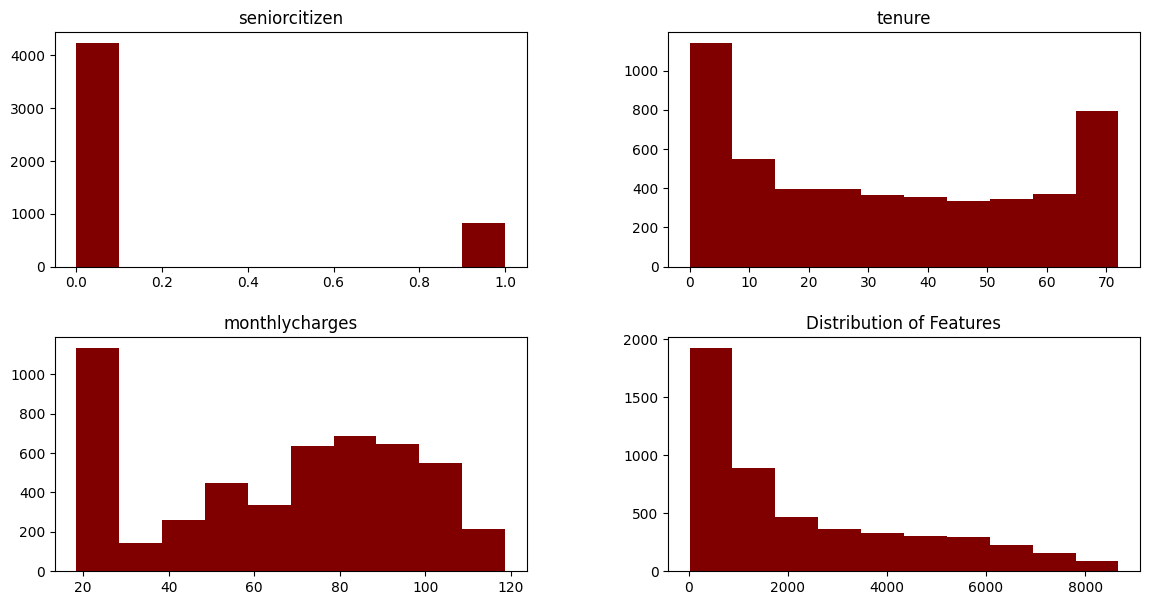

In [76]:
#check for distribution of features using a histogram
training_data.hist(figsize=(14, 7), color = 'maroon', grid=False)
plt.title('Distribution of Features')
plt.show()

##### Check the density distribution

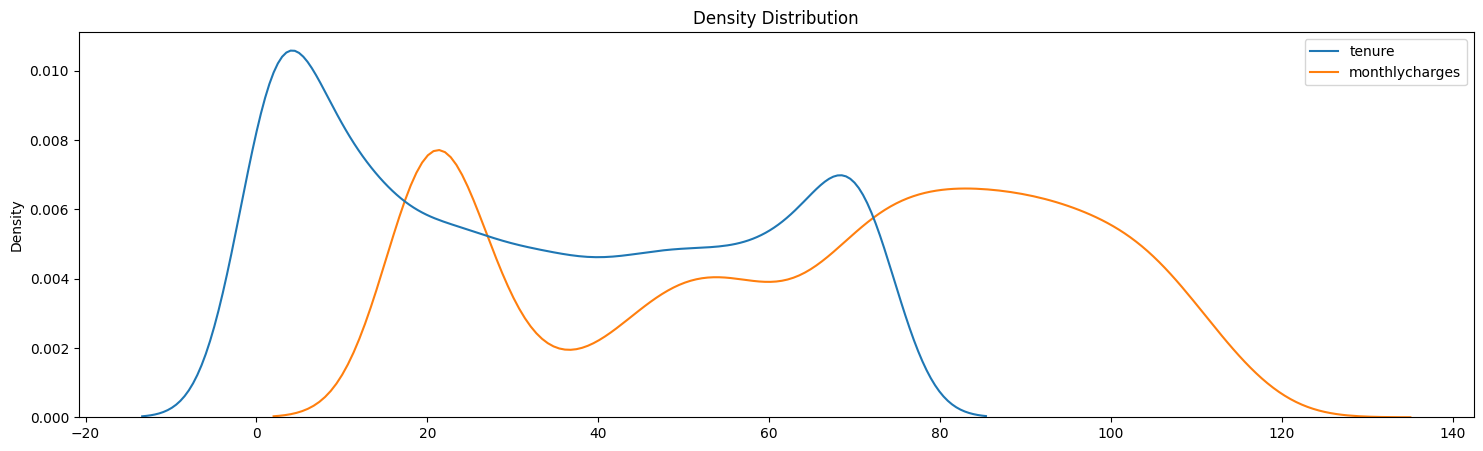

In [77]:
# check the density distribution
plt.figure(figsize=(18,5))
plt.title('Density Distribution')
sns.kdeplot(training_data.drop(['totalcharges', 'seniorcitizen'], axis=1)) #drop these 2 columns due to their scales
plt.show()

- The Data set is positively skewed

In [78]:
training_data.select_dtypes(include='number').skew()

seniorcitizen     1.831228
tenure            0.225132
monthlycharges   -0.238767
totalcharges      0.944846
dtype: float64

- MonthlyCharges is negatively skewed

##### Check for distribution of numeric variables

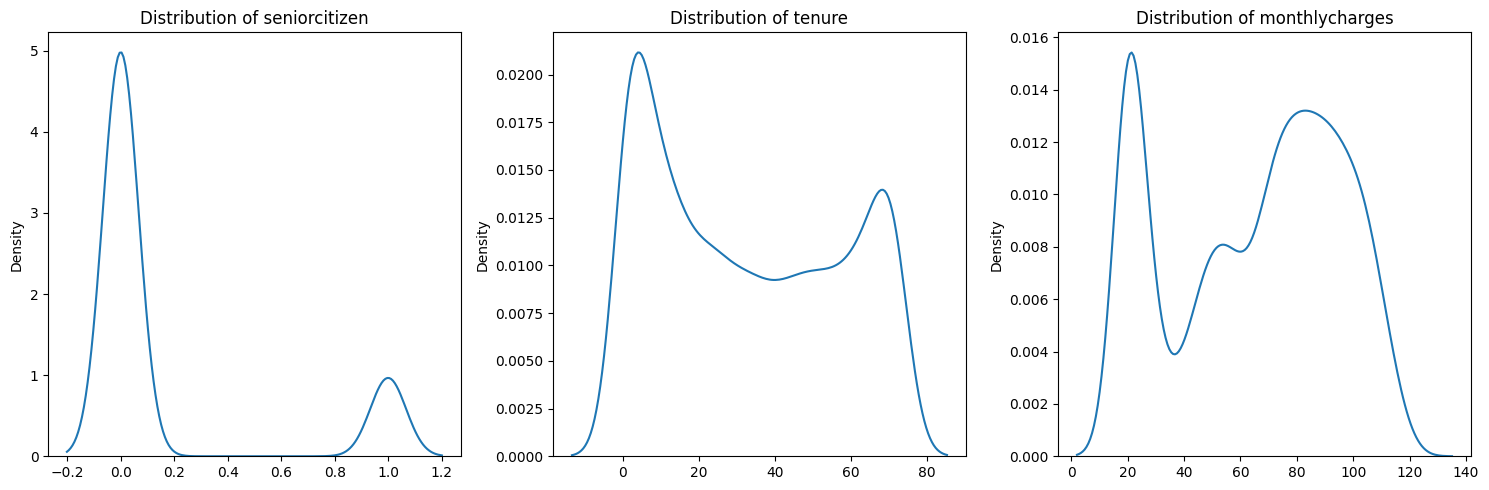

In [79]:
def distribution_plots(df):
    numeric_columns = df.select_dtypes(include='number').columns
    num_plots = len(numeric_columns)
    fig, axes = plt.subplots(1, min(num_plots, 3), figsize=(15, 5))
    for i, column in enumerate(numeric_columns[:3]):  # Limit to a maximum of 3 plots
        sns.kdeplot(data=df, x=column, ax=axes[i])
        axes[i].set_title(f"Distribution of {column}")
        axes[i].set_xlabel("")
    plt.tight_layout()
    plt.show()

distribution_plots(training_data)


##### Check for distribution of categorical variables

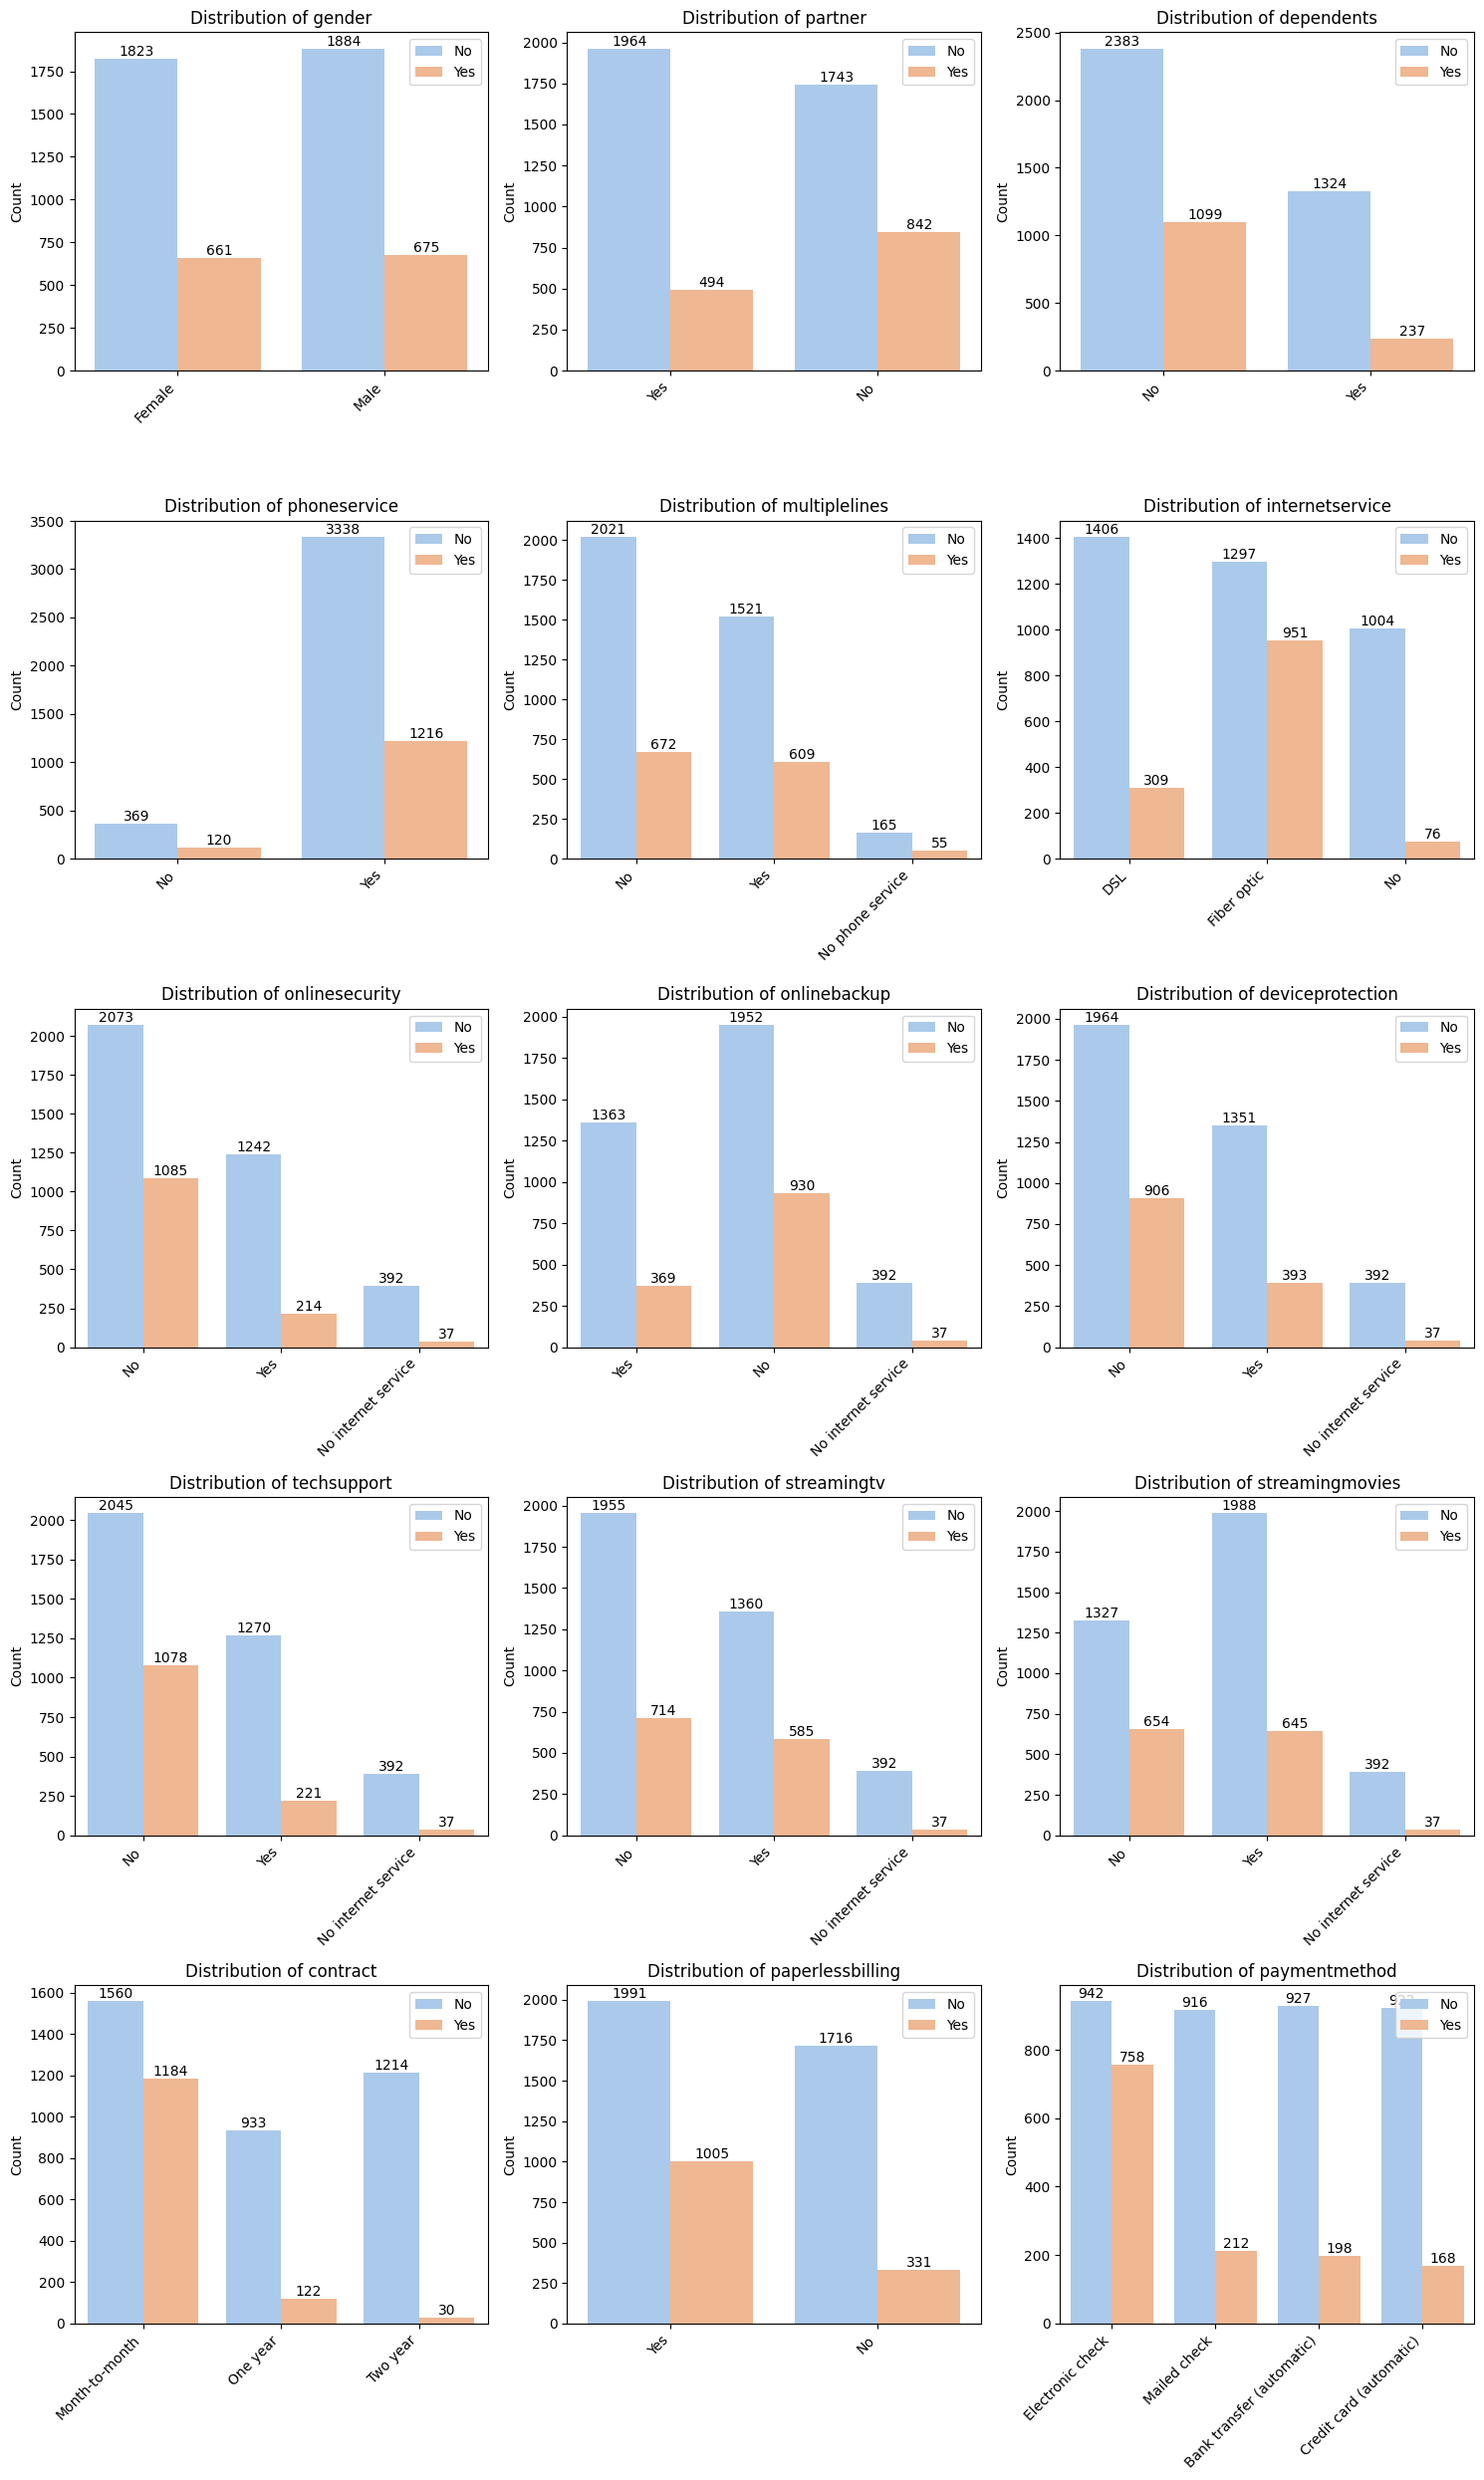

In [80]:
def categorical_distribution(df):
    cat_cols = df.select_dtypes(include='object').columns
    num_plots = min(len(cat_cols), 15)
    num_rows = (num_plots - 1) // 3 + 1
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
    for ax, col in zip(axes.flat, cat_cols[:num_plots]):
        sns.countplot(data=df, x=col, orient='v', palette='pastel', hue='churn', ax=ax)
        for container in ax.containers:
            ax.bar_label(container)
        ax.set_title(f"Distribution of {col}")
        ax.set_xlabel("")
        ax.set_ylabel("Count")
        ax.legend(loc='upper right')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Assuming train_data is your DataFrame
categorical_distribution(training_data)


#### Check for Outliers

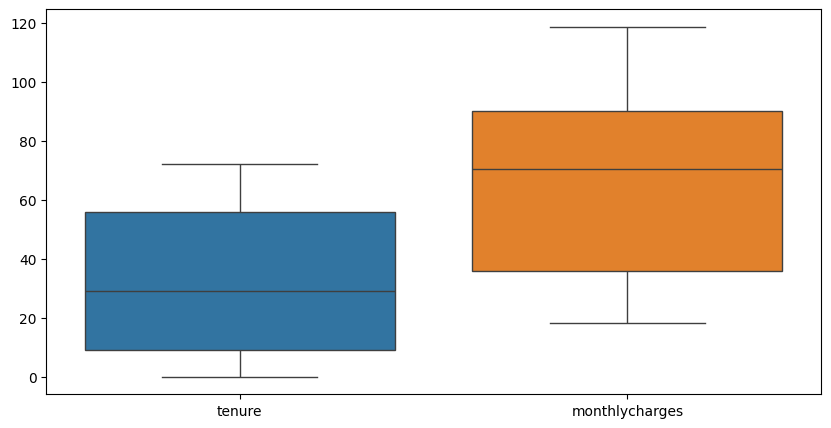

In [81]:
# check for outliers using a boxplot
# drop TotalCharges column due to its high scale
plt.figure(figsize=(10, 5))
sns.boxplot(training_data.drop(['totalcharges', 'seniorcitizen'], axis=1))
plt.show()

- There are no outliers

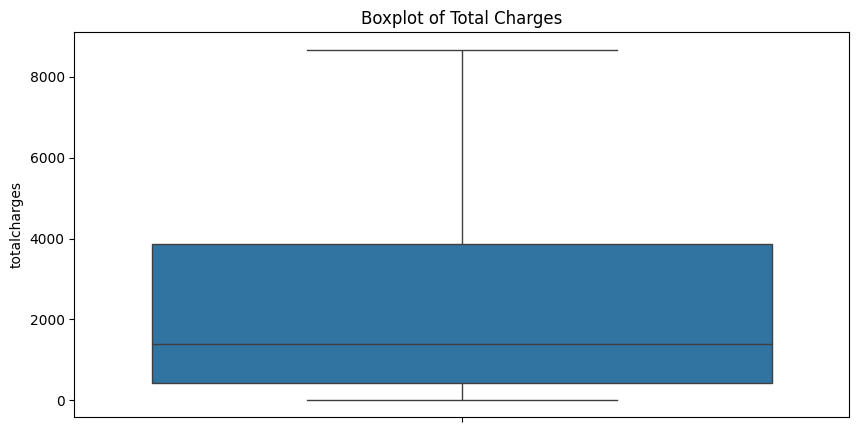

In [82]:
# check for outliers in the TotalCharges column

plt.figure(figsize=(10, 5))
sns.boxplot(training_data['totalcharges'])
plt.title('Boxplot of Total Charges')
plt.show()

- There are no outliers

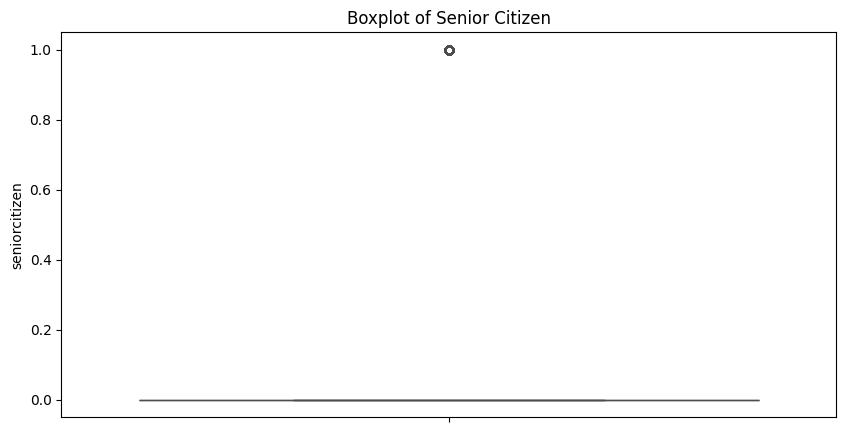

In [83]:
# check for outliers in the SeniorCitizen column

plt.figure(figsize=(10, 5))
sns.boxplot(training_data['seniorcitizen'], color='orange')
plt.title('Boxplot of Senior Citizen')
plt.show()

- There is one outlier in the SeniorCitizens column

### **Bivariate Analysis**

In [84]:
# check for datatypes
training_data.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [85]:
# group categorical columns
categorical_columns = training_data.select_dtypes('object').columns
categorical_columns

Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object')

In [86]:
# group numerical columns
numerical_columns = training_data.select_dtypes('number').columns
numerical_columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges'], dtype='object')

In [87]:
# check for correlation in numerical variables
num_correlation = training_data[numerical_columns].corr()
num_correlation

,seniorcitizen,tenure,monthlycharges,totalcharges
seniorcitizen,1.000000,0.004597,0.221780,0.095198
tenure,0.004597,1.000000,0.240645,0.825106
monthlycharges,0.221780,0.240645,1.000000,0.646568
totalcharges,0.095198,0.825106,0.646568,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

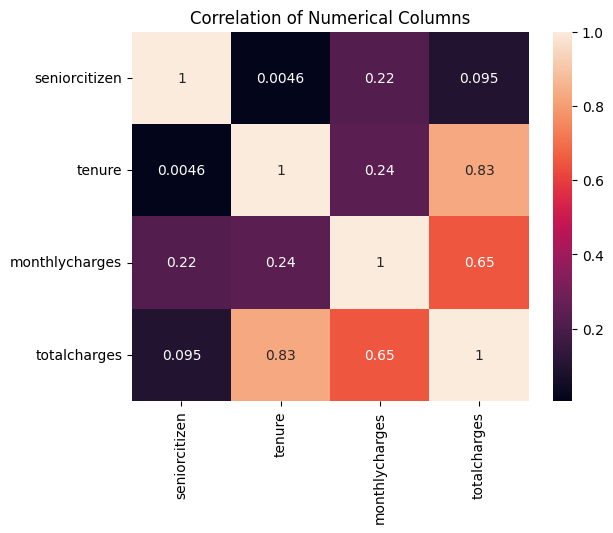

In [88]:
# visualize the above using a heatmap for more detailed insight
sns.heatmap(num_correlation, annot=True) 
plt.title('Correlation of Numerical Columns')
plt.show

- Total charges is higly correlated with tenure
- Total charges is also correlated with monthly charges
- lowest correlation is between tenure and senior citizen

##### Relationship between contract and churning

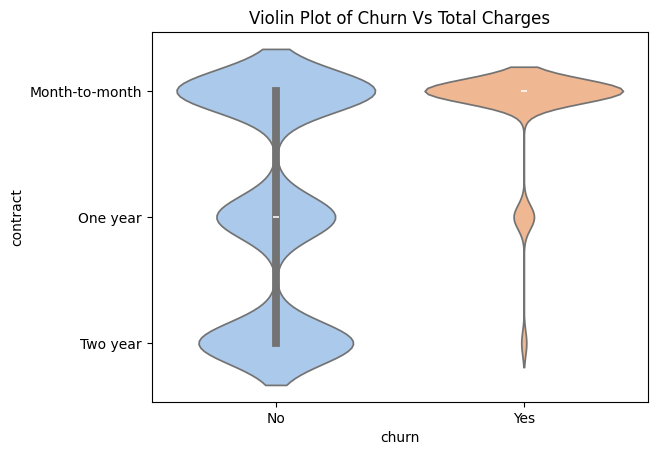

In [89]:
sns.violinplot(data=training_data, x='churn', y='contract', palette='pastel')
plt.title('Violin Plot of Churn Vs Total Charges')
plt.show()


- Customers with two-year contracts are the least likely to churn
- Customers with month-month contracts are the most likely to churn
- The shorter the contract, the more likely that a customer will stop using the network

##### Relationship between total charges and churning

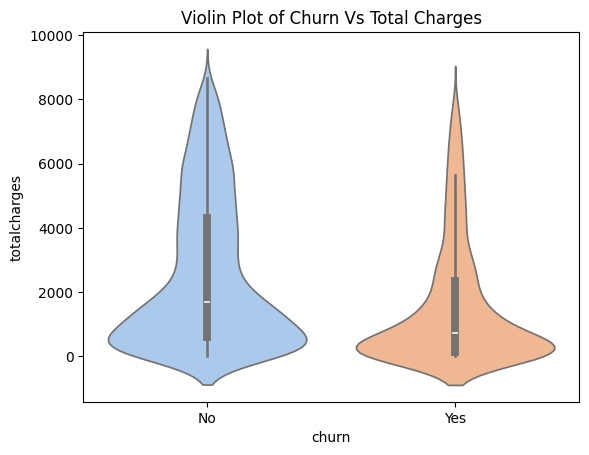

In [90]:
# plot a violion plot
sns.violinplot(data=training_data, x='churn', y='totalcharges', palette='pastel')
plt.title('Violin Plot of Churn Vs Total Charges')
plt.show()

- Majority of customers have total charges below 2000
- Majority of churning customers are clustered below total charges of 1000

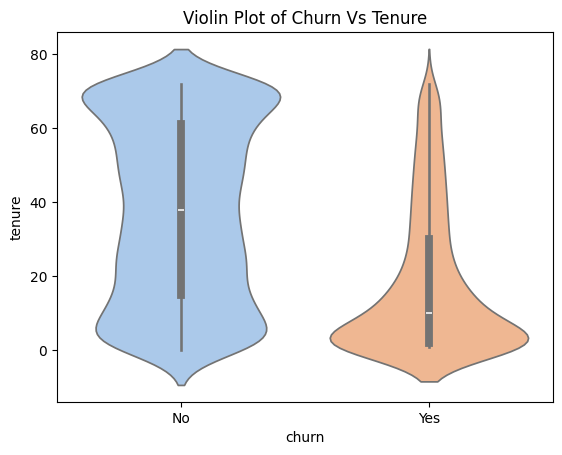

In [91]:
# plot a violin plot
sns.violinplot(data=training_data, x='churn', y='tenure', palette='pastel')
plt.title('Violin Plot of Churn Vs Tenure')
plt.show()

- Majority of customers who churn stay in the company for a period less than 20 months
- Less customers tend to churn if they have stay in the company for more that 40 months
- Customers who have stayed in the company for 60-80 months have the highest retention

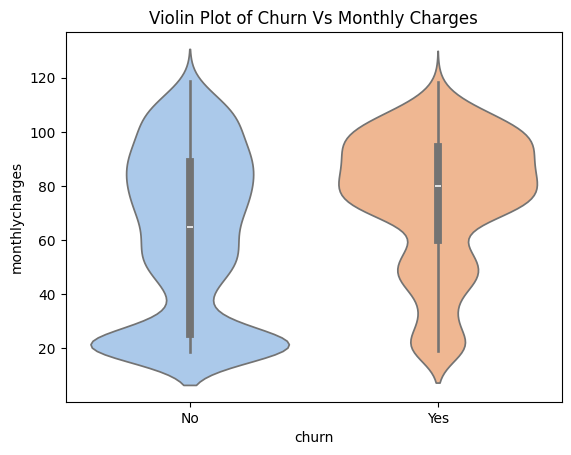

In [92]:
# plot a violin plot
sns.violinplot(data=training_data, x='churn', y='monthlycharges', palette='pastel')
plt.title('Violin Plot of Churn Vs Monthly Charges')
plt.show()

- From the above it is clear that majority of customers who did not churn have monthly charges of 20 while majority who churned have monthly charges between 80 and 100

<Figure size 1500x500 with 0 Axes>

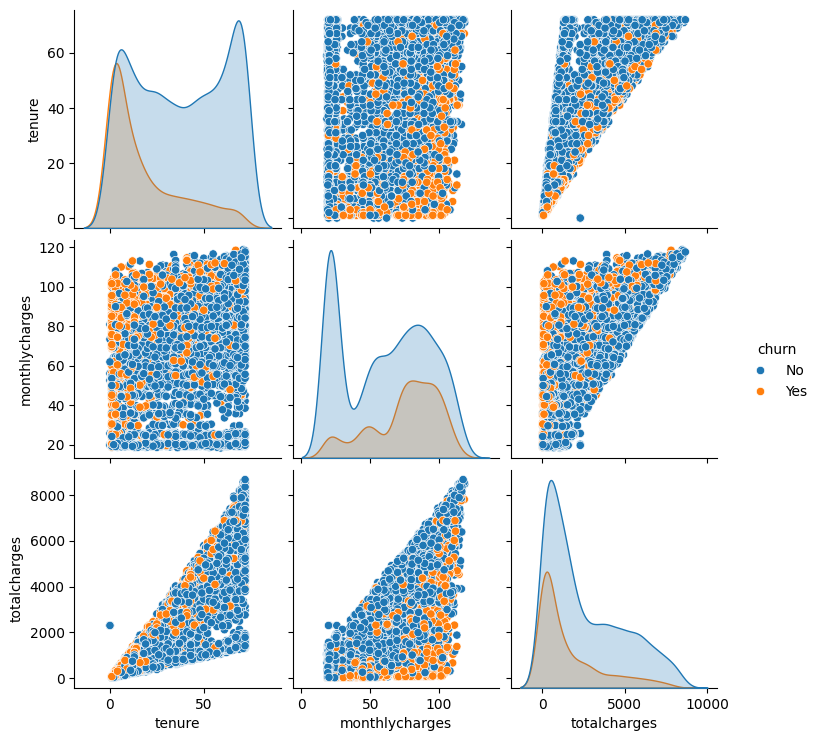

In [93]:
# Create pairplots
plt.figure(figsize=(15,5))
sns.pairplot(training_data.drop('seniorcitizen', axis=1), hue='churn')
plt.show()

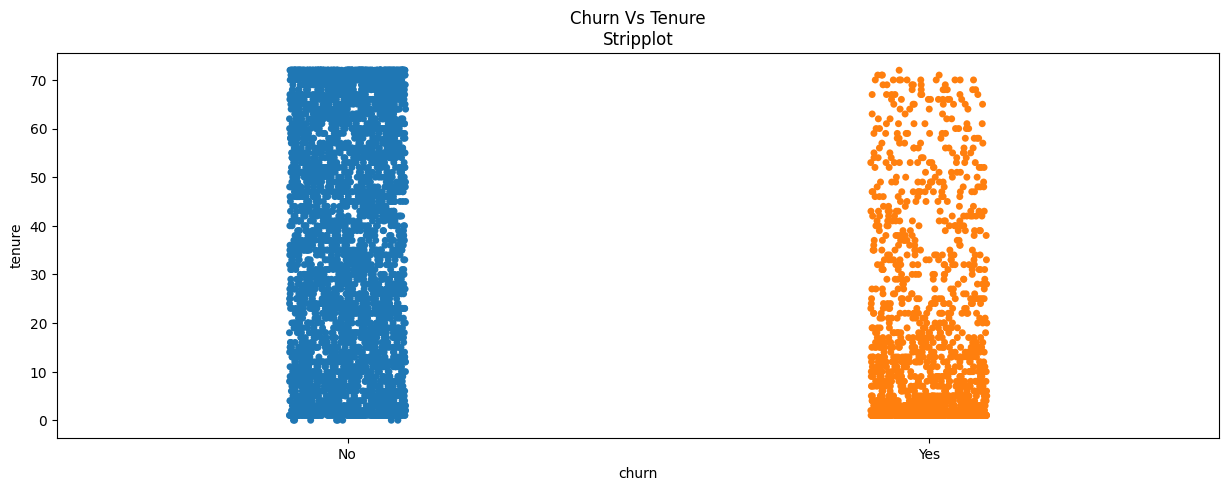

In [94]:
# stripplot to visualize churn againt tenure
plt.figure(figsize=(15,5))
sns.stripplot(data=training_data, x='churn', y='tenure',hue='churn', legend=False)
plt.title('Churn Vs Tenure\nStripplot')
plt.show()

## **Multivariate Analysis**

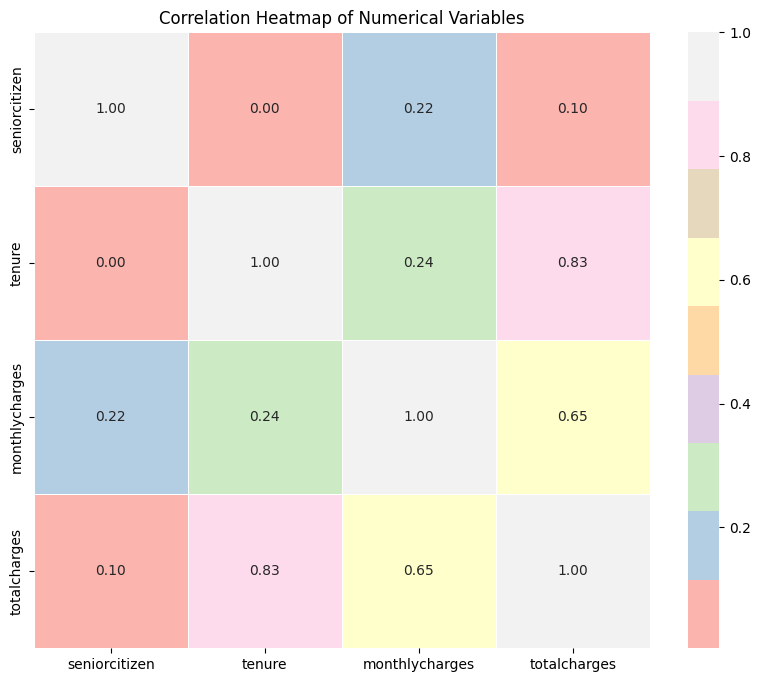

In [95]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=training_data[numerical_columns].corr(), cmap='Pastel1', annot=True, fmt=".2f", linewidths=.5, square=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


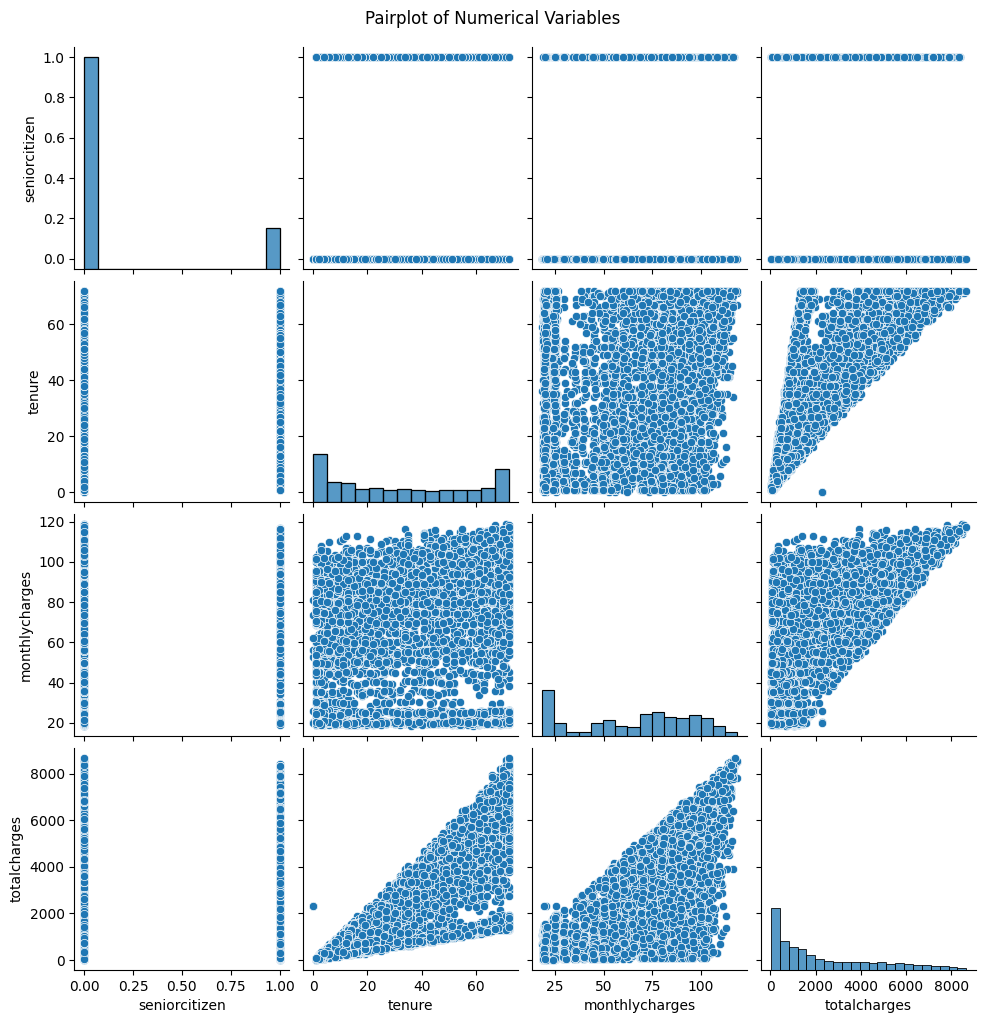

In [96]:

# Scatterplot matrix
sns.pairplot(training_data[numerical_columns])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

- There's a positive linear relationship between totalcharges and tenure, total charges and monthly charges, and a strong relationship between monthly charges and tenure

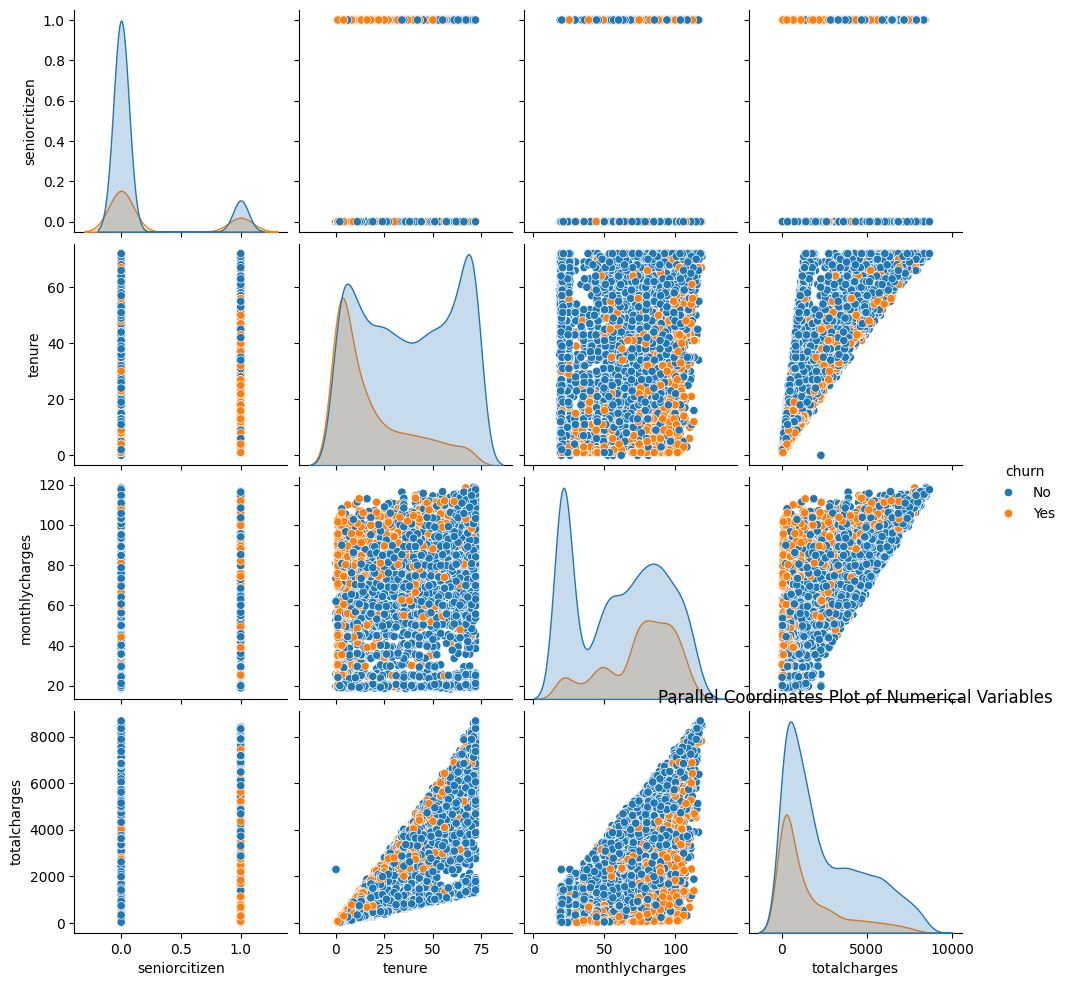

In [97]:
# Parallel coordinates plot
sns.pairplot(training_data, hue='churn', vars=numerical_columns, diag_kind='kde')
plt.title('Parallel Coordinates Plot of Numerical Variables')
plt.show()

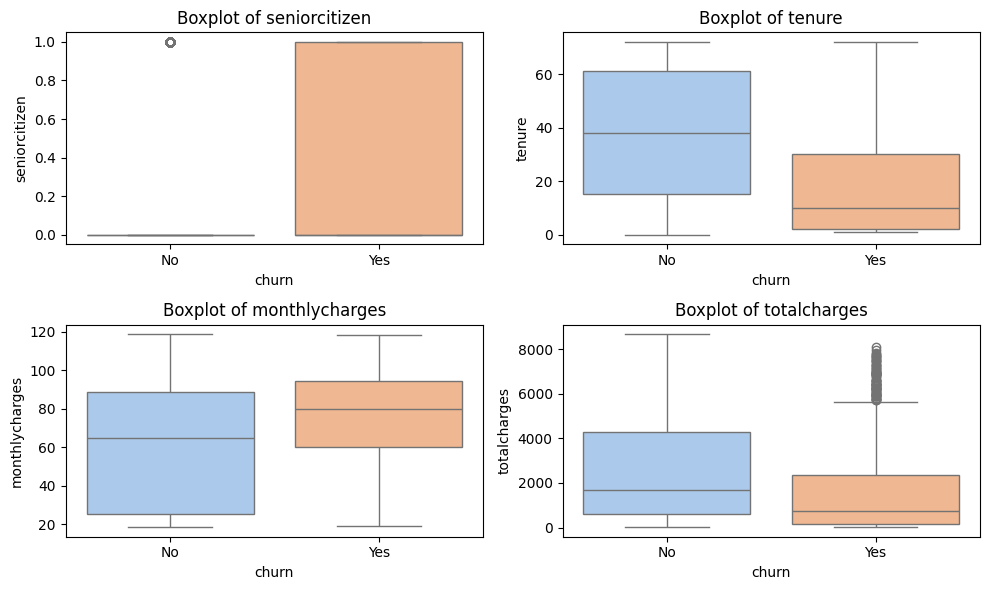

In [98]:
# Boxplot
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='churn', y=col, data=training_data, palette='pastel')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## **Analytical Questions**

#### **1. How do monthly charges and total charges impact customer churning?**

##### Monthly Charges Versus Churn

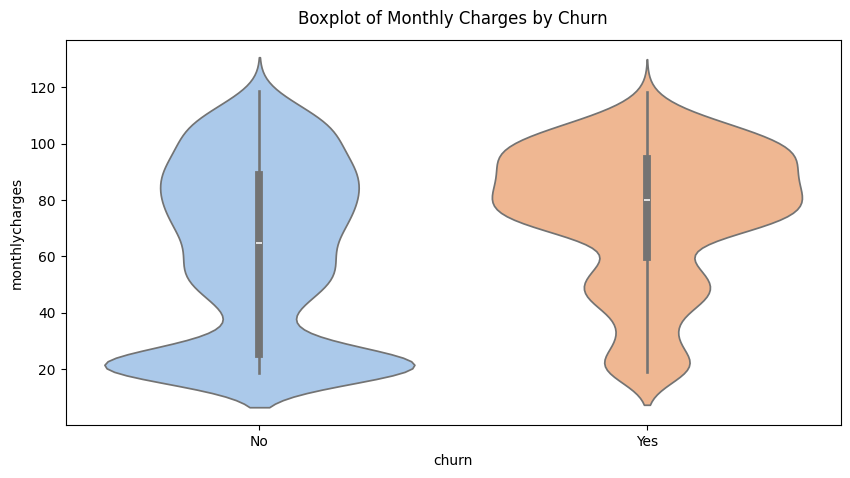

In [99]:
# Pairplot with 'MonthlyCharges' and 'Churn'
plt.figure(figsize=(10, 5))
sns.violinplot(data=training_data, x='churn', y='monthlycharges', palette='pastel')
plt.title('Boxplot of Monthly Charges by Churn', y=1.02)
plt.show()


- Customers with monthly charges of at least 20 churn at the lowest rate
- Customers with monthly charges between 80 and 100 churn at the highest rate


#### Total Charges Versus Churn

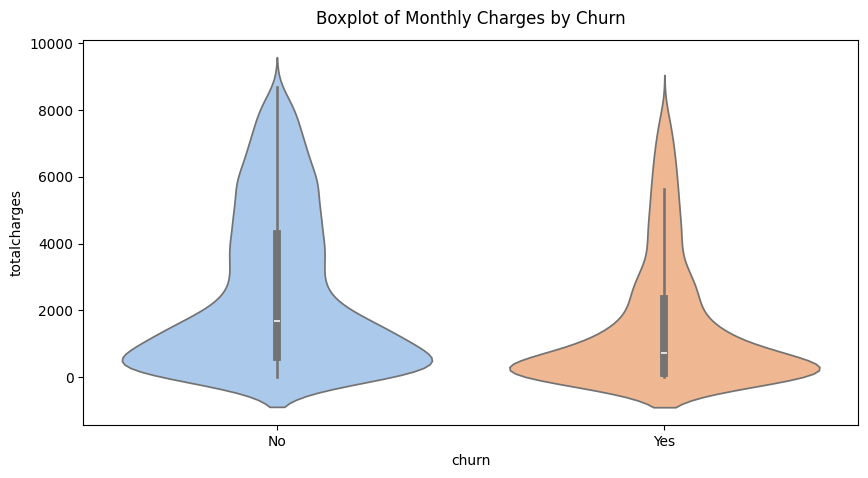

In [100]:
# Pairplot with 'MonthlyCharges' and 'Churn'
plt.figure(figsize=(10, 5))
sns.violinplot(data=training_data, x='churn', y='totalcharges', palette='pastel')
plt.title('Boxplot of Monthly Charges by Churn', y=1.02)
plt.show()


- Majority of customers have total charges below 2000
- Customers with lower total charges churn faster than those with higher ones

#### **2. How does tech support influence the likelihood of a customer to churn or not?**

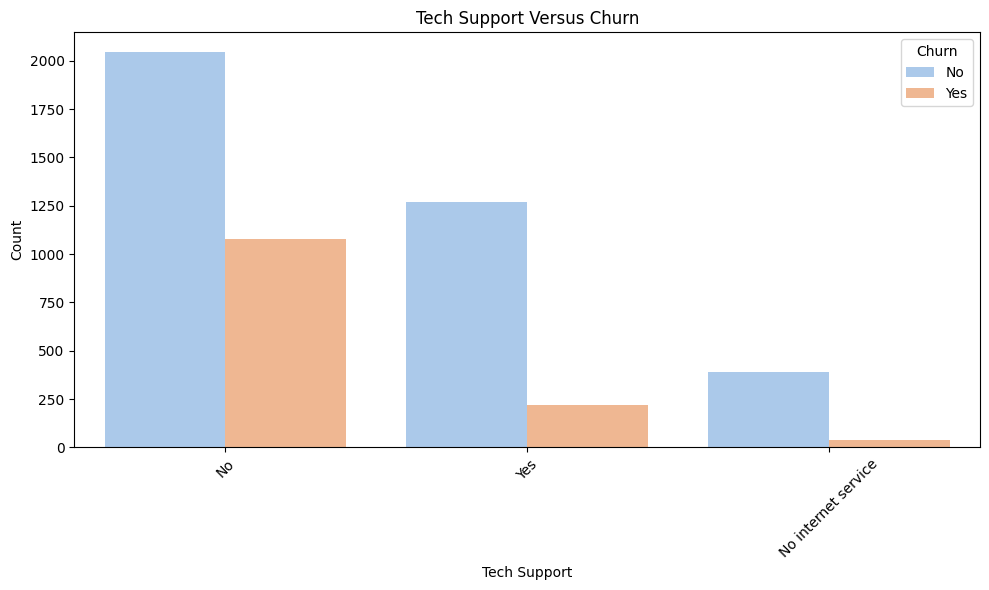

In [101]:
# countplot showing rate of churning and tech support
plt.figure(figsize=(10, 6))
sns.countplot(data=training_data, x='techsupport', hue='churn', palette='pastel')
plt.title('Tech Support Versus Churn')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

- For customers without tech support, they do not churn more. 1000 customers without tech support churned while 1400 did not.
- For customers with tech support, only 200  churned while more than 1200 did not churn
- For customers with no internet service, the churn rate is very low. Less than 100 customers churned while more than 200 did not.

### **3. How does tenure impact customer churning?**


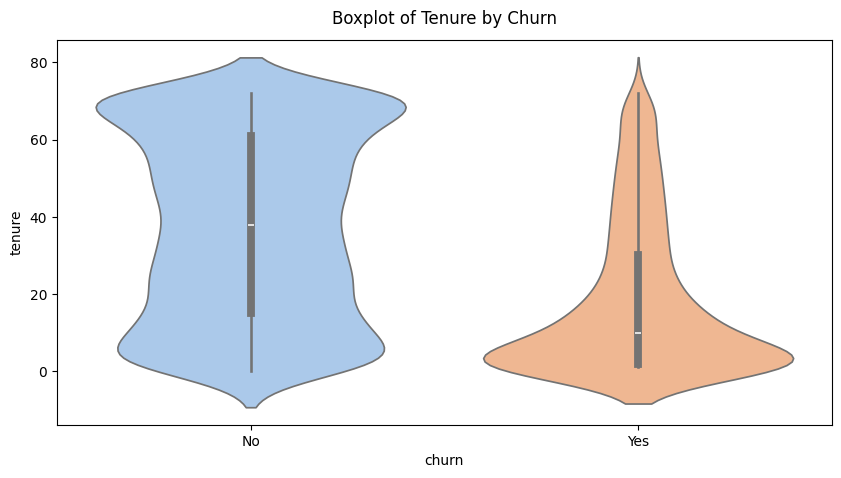

In [102]:
# Viiolinrplot with 'tenure' and 'Churn'
plt.figure(figsize=(10, 5))
sns.violinplot(data=training_data, x='churn', y='tenure', palette='pastel')
plt.title('Boxplot of Tenure by Churn', y=1.02)
plt.show()


- New customers churn at a higher rate than older customers
- Customers churn more between 0-20 weeks
- Older customers are less likely to churn
- Customers between 40 and 70 weeks churn at the lowest rate
- Customers churn less over time



### **4. How does internet service type impact churning?**

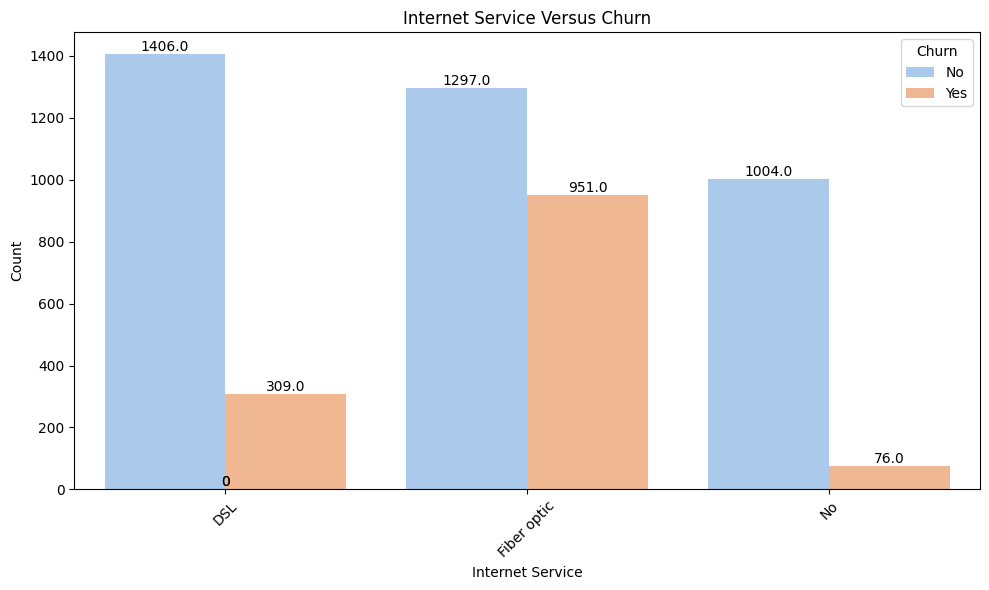

In [103]:
# countplot showing rate of churning and internet service type
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=training_data, x='internetservice', hue='churn', palette='pastel')

# Add count labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Internet Service Versus Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()


- Customers using fiber optic churn more in comparison to those using DSL and those without. 951 customers with fiber optic churned while only 309 with DSL churned
- DSL internet service has the highest customer retention, retaining 1406 customers and only churning 309. Fiber optic , on the other hand, is the worst performing service, retaining 1296 and churning 951. 
- Customers without internet service also had a good retention rate, where only 76 churned while 1004 retained.

### **5. How does the payment method impact churning?**

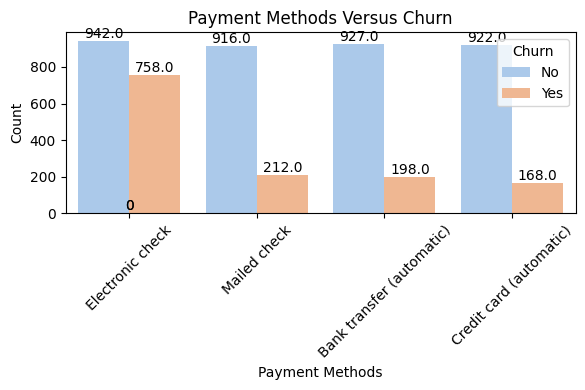

In [158]:
# countplot showing rate of churning and internet service type
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=training_data, x='paymentmethod', hue='churn', palette='pastel')

# Add count labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Payment Methods Versus Churn')
plt.xlabel('Payment Methods')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()


- Customers who pay thorugh credit card (automatic) have the best retention rate. 922 were retained while 168 churned.
- Customers who pay via by bank transfers (916 retained, 212 churned) and mailed checks (927 retained, 198 churned) have the second best retention rates. 
- Customers who pay via electronic check show the poorest retention (941 retained versus 758 churned)

#### **6. How does contract type impact customer churning?**

<Figure size 1000x600 with 0 Axes>

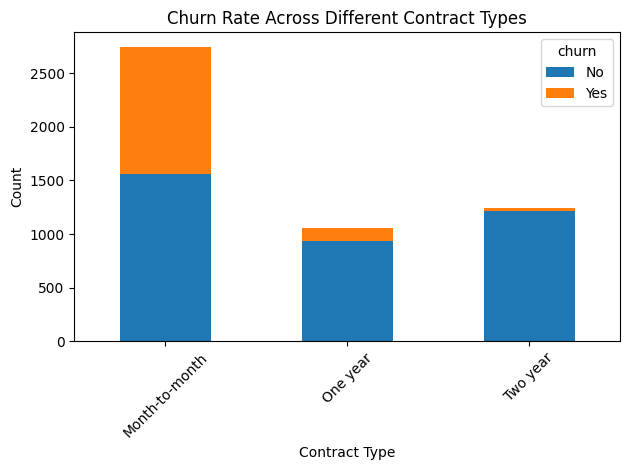

In [105]:
# Group the data by 'Contract' and 'Churn', and count the occurrences
contract_churn_counts = training_data.groupby(['contract', 'churn']).size().unstack()

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
contract_churn_counts.plot(kind='bar', stacked=True)
plt.title('Churn Rate Across Different Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.legend(title='churn', loc='upper right')
plt.tight_layout()
plt.show()

- These results confirm what was noted ni tenure vs churn

*Customers who stay longer churn less while new customers churn at a higher rate*

- Month-month contract types has high churn while one-year and two-year contract types have significantly lower churn

### **7. Which gender is churning at a higher rate?**


In [106]:
training_data.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1.0,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45.0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


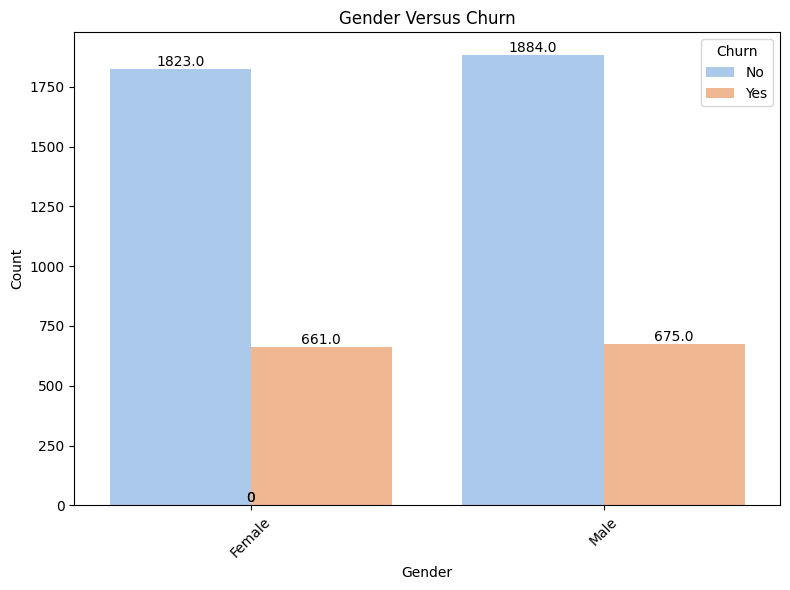

In [160]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=training_data, x='gender', hue='churn', palette='pastel')

# Add count labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Gender Versus Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()


- Male and female customers are churning at nearly the same rate
- Among female custmers, 1823 retaained while 661 churned
- Among male customers, 1883 retained while 675 churned
- Gender might not a significant predictor of churn

### **8. Does having a partner affect churning?**

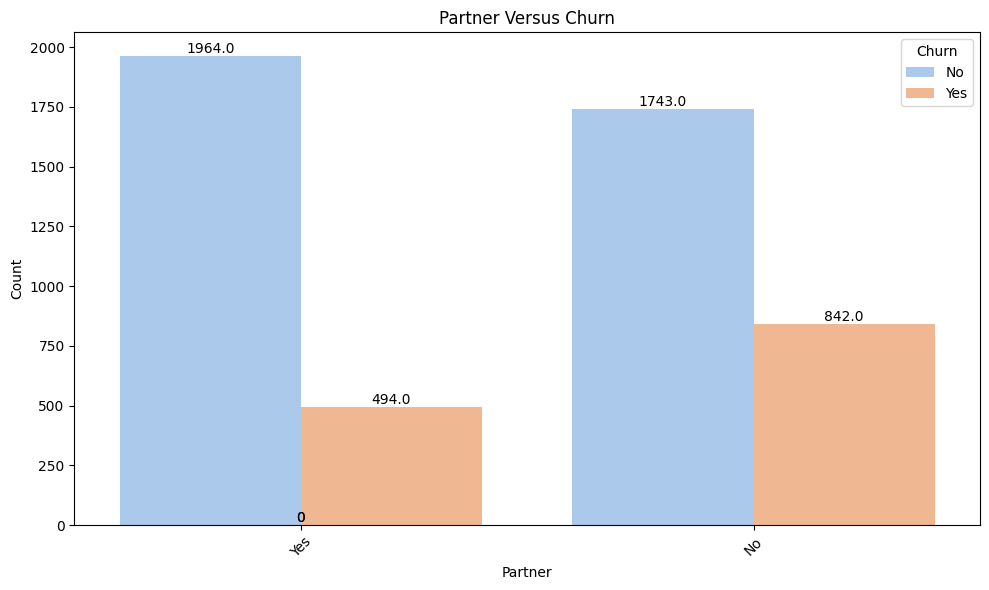

In [108]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=training_data, x='partner', hue='churn', palette='pastel')

# Add count labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Partner Versus Churn')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()


- More customers without partners churned compared to those with customers

### **9. What is the total attrition at the company?**

In [109]:
training_data['churn'].value_counts()

churn
No     3707
Yes    1336
Name: count, dtype: int64

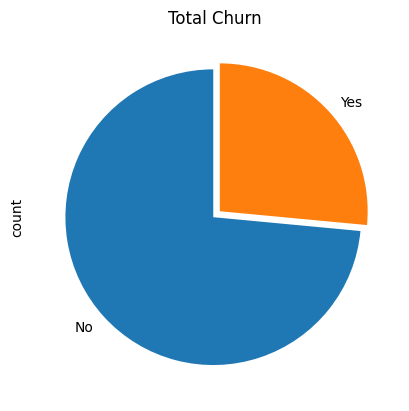

In [110]:
training_data['churn'].value_counts().plot.pie(startangle=90, explode=(0.01, 0.05))
plt.title('Total Churn')
plt.show()

## **Hypothesis Testing**

##### **Null Hypothesis**: There is no statistically significant relationship between contract type and customer churn 
##### **Alternative hypothesis**: There is a statistically significant relationship between contract type and customer churn

The case here is to test for the association of these two variables. Therefore, the Chi-Square test is the most appropriate

In [111]:

# Create a contingency table
contingency_table = pd.crosstab(index=training_data['contract'], columns=training_data['churn'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

alpha = 0.05

# Print out the result
if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between ContractType and churn.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between ContractType and churn.")


Chi-square statistic: 882.0901975577578
p-value: 2.86119415951209e-192
Reject the null hypothesis. There is a significant relationship between ContractType and churn.


## **4. Data Preparation**

### **Check is the training data is balanced**

In [112]:
training_data['churn'].value_counts()


churn
No     3707
Yes    1336
Name: count, dtype: int64

In [113]:
# Calculate the ratio of the minority class to the majority class
ratio = training_data['churn'].value_counts().min() / training_data['churn'].value_counts().max()

# Convert ratio to the desired format
minority_count = training_data['churn'].value_counts().min()
majority_count = training_data['churn'].value_counts().max()

ratio_str = f"{minority_count}:{majority_count}"

print("Ratio of minority class to majority class:", ratio_str)


Ratio of minority class to majority class: 1336:3707


In [114]:
# check for their difference
difference = 3706-1336
difference

2370

- The data is moderately imbalanced
- There is a difference of 2370 between the majority of minority class, at a ratio of 3706:1336
- We will train this data first before training the model on a set of balanced data

### **Split Dataset into Training and Evaluation (X and Y)**

- X: Input Data
- y: Label

In [115]:
# drop churn from training_data to create X
X = training_data.drop('churn', axis=1)
y = training_data['churn']


In [117]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [118]:
# Instantiate LabelEncoder
encoder = LabelEncoder()

# Fit and transform the target variable in your training data
y_train_encoded = encoder.fit_transform(y_train) # to change yes/no to 1/0

# Transform the target variable in your test data
y_test_encoded = encoder.transform(y_test)

### **Prepare Pipelines**

In [120]:
categorical_columns = X.select_dtypes('object').columns
categorical_columns

Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [121]:
numerical_columns = X.select_dtypes('number').columns
numerical_columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges'], dtype='object')

- Build a numeric pipeline

In [122]:
numeric_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')), #impute nulls with mean
    ('scaler', RobustScaler()),
])

- Build categorical pipeline

In [123]:
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])

- Create a preprocessor

In [124]:
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numerical_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns),
])

## **5. Modelling**

In [125]:

models = [
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic_Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Random_Forest', RandomForestClassifier(random_state=42)),
]

### Modelling with Imbalanced Data

In [126]:
# create final pipeline with the preprocessor estimator
all_pipelines = {}

# create the metrics dataframe
metric_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

for model_name, classifier in models:
    
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier),
    ])
    
    #fit data to pipeline
    final_pipeline.fit(X_train, y_train_encoded)
    
    # add all pipelines into pipeline dictionary
    all_pipelines[model_name] = final_pipeline
        
    # predicting on test set
        y_pred = final_pipeline.predict(X_test)
    
    #Generate classification report for each pipeline or model
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Grab all important metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']
    
    metric_table.loc[len(metric_table)] = [model_name, accuracy, precision, recall, f1]
    
metric_table

,model_name,accuracy,precision,recall,f1_score
0,Decision_Tree,0.717118,0.721221,0.717118,0.719069
1,Logistic_Regression,0.777264,0.772403,0.777264,0.774519
2,KNN,0.748843,0.750461,0.748843,0.749630
3,Random_Forest,0.776603,0.766374,0.776603,0.769806


In [127]:
# arrange in order
metric_table.sort_values(by='f1_score', ascending=False)

,model_name,accuracy,precision,recall,f1_score
1,Logistic_Regression,0.777264,0.772403,0.777264,0.774519
3,Random_Forest,0.776603,0.766374,0.776603,0.769806
2,KNN,0.748843,0.750461,0.748843,0.749630
0,Decision_Tree,0.717118,0.721221,0.717118,0.719069


#### Key Insights

- Logistic Regression achieved the highest F1 score among all models, indicating good overall performance in terms of precision and recall.
- Random Forest achieved a slightly lower F1 score compared to Logistic Regression but still performed well.
- K-Nearest Neighbors (KNN) achieved the lowest F1 score among all models, indicating slightly lower overall performance compared to Logistic Regression and Random Forest.
- Decision Tree achieved the lowest F1 score among all models, indicating the lowest overall performance in terms of precision and recall

#### Visualization using a confusion matrix

In [128]:
encoder.classes_

array(['No', 'Yes'], dtype=object)

### **Train on Balanced Data**

In [129]:

# create final pipeline with the preprocessor estimator
all_balanced_pipelines = {}

# add confusion matrix to all pipelines
all_confusion_matrix = {}

# create the metrics dataframe
balanced_metric_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

for model_name, classifier in models:
    
    balanced_pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote-sampler', SMOTE(random_state=42)),
        ('feature-selection', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier),
    ])
    
    #fit data to pipeline
    balanced_pipeline.fit(X_train, y_train_encoded)
    
    # add all pipelines into pipeline dictionary
    all_balanced_pipelines[model_name] = balanced_pipeline
    
    # Generate all matrix
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    
    # add vonfusion matrix into pipeline dictionary
    all_confusion_matrix[model_name] = conf_matrix
        
    # predicting on test set
    
    y_pred = balanced_pipeline.predict(X_test)
    
    #Generate classification report for each pipeline or model
    balanced_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Grab all important metrics
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']
    
    balanced_metric_table.loc[len(balanced_metric_table)] = [model_name, accuracy, precision, recall, f1]
    

balanced_metric_table.sort_values(by='f1_score', ascending=False)

,model_name,accuracy,precision,recall,f1_score
3,Random_Forest,0.770654,0.773468,0.770654,0.771981
1,Logistic_Regression,0.736286,0.794494,0.736286,0.750222
0,Decision_Tree,0.708526,0.724136,0.708526,0.715065
2,KNN,0.677462,0.754459,0.677462,0.695758


In [161]:
# arrange in order
balanced_metric_table.sort_values(by='f1_score', ascending=False)

,model_name,accuracy,precision,recall,f1_score
3,Random_Forest,0.770654,0.773468,0.770654,0.771981
1,Logistic_Regression,0.736286,0.794494,0.736286,0.750222
0,Decision_Tree,0.708526,0.724136,0.708526,0.715065
2,KNN,0.677462,0.754459,0.677462,0.695758


- For the balanced data, Random Forest Is the best perfoming model with logistic regression taking a second place, while KNN is the poorest performing model

In [130]:
# how the matrix will look for the Random Forest
forest_matrix = all_confusion_matrix['Random_Forest']
forest_matrix

array([[734, 378],
       [110, 291]], dtype=int64)

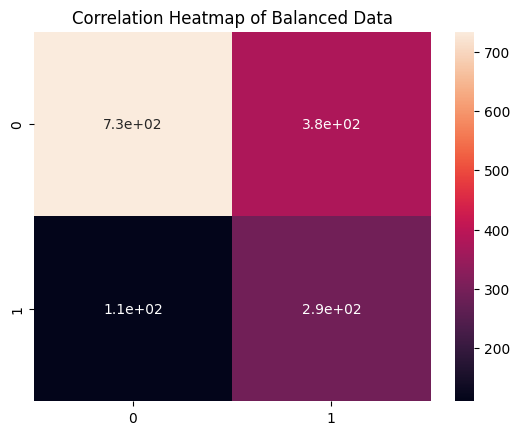

In [131]:
# visualize in a heatmap
sns.heatmap(forest_matrix, annot=True)
plt.title('Correlation Heatmap of Balanced Data')
plt.show()


- The True Positive from the model is 734
- The True negative is 75
- The False Positive is 110
- The False negative is 291

In [132]:
encoder.classes_

array(['No', 'Yes'], dtype=object)

#### **Visualize Evaluation Using  ROC -AUC**

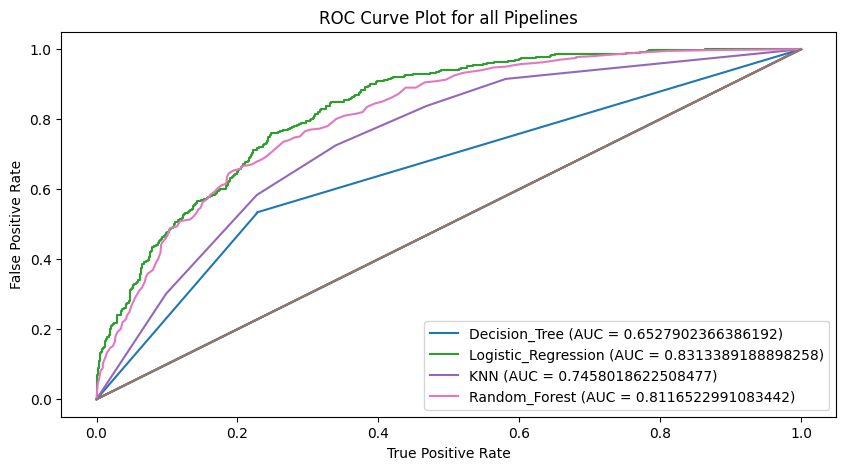

In [133]:

# Plot roc_curves
fig, ax = plt.subplots(figsize=(10, 5))
all_roc_data = {}

for model_name, pipeline in all_pipelines.items():

    y_score = pipeline.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_score)
    
    roc_auc = auc(fpr,tpr)

    roc_data = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': thresholds})

    all_roc_data[model_name] = roc_data

    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc})')

    ax.plot([0,1], [0,1])

    ax.set_ylabel('False Positive Rate')
    
    ax.set_xlabel('True Positive Rate')


ax.set_title('ROC Curve Plot for all Pipelines')
plt.legend()
plt.show()

- Logistic regression is the best performing model, closely followed by Random Forest

In [134]:
# Preview of the best perfoming thresholds for Logistic Regression
all_roc_data['Logistic_Regression'].loc[120:,]

,False Positive Rate,True Positive Rate,Threshold
120,0.088129,0.448878,0.798906
121,0.089029,0.448878,0.798521
122,0.089029,0.451372,0.796565
123,0.089928,0.451372,0.795783
124,0.089928,0.453865,0.795198
...,...,...,...
443,0.784173,0.995012,0.029483
444,0.784173,0.997506,0.029147
445,0.863309,0.997506,0.016820
446,0.863309,1.000000,0.016748


In [135]:
# get  logistic regression pipeline
logistic_reg_pipeline = all_pipelines['Logistic_Regression']
logistic_reg_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [136]:
threshold = 0.016748 #define threshold

# make predictions using the pipeline
y_pred_proba = logistic_reg_pipeline.predict_proba(X_test)[: , 1]

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (y_pred_proba > threshold).astype(int)

# Compute the confusion matrix
threshold_matrix = confusion_matrix(y_test_encoded, binary_predictions)
threshold_matrix


array([[152, 960],
       [  0, 401]], dtype=int64)

<Axes: >

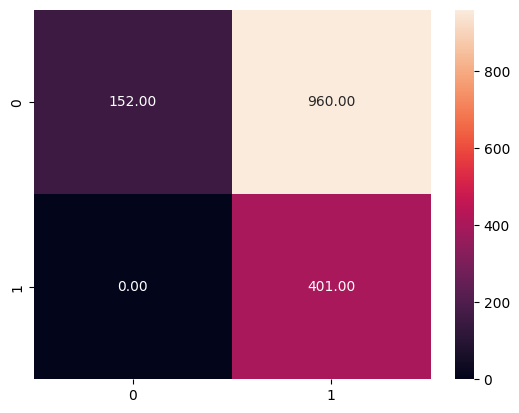

In [137]:
sns.heatmap(threshold_matrix, annot=True, fmt='.2f')

#### **Business Impact Assessment**
- The True Positive Rate is significantly
- The threhold to meet a definition is approximateyly 0.016 for Logistics Regression Model

### **Hyper-Parameter Tuning**

- The best performing model is the Logistic Regression and RAndom Forests. We'll use this to tune hyperparameters

In [138]:

# Define the hyperparameters to search

param_grids = {

    'Decision_Tree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },

    'Logistic_Regression': {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],        
        'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'classifier__max_iter': [300]
    },

    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11]
    },

    'Random_Forest': {
        'classifier__n_estimators': [10, 50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30]
    } 

    }


params = {}
search_histories = {}

for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(
        estimator = final_pipeline, 
        param_grid = param_grid, 
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
        scoring = ['f1_weighted', 'precision', 'recall'],
        refit = 'f1_weighted',
        verbose = 3, 
        n_jobs = -1
    )
    grid_search.fit(X_train, y_train_encoded)
    params[model_name] = grid_search
        
    search_history = pd.DataFrame(grid_search.cv_results_)        
    search_histories[model_name] = search_history

for model_name, grid_search in params.items():
    print(f'Best hyperparamters for {model_name}:{grid_search.best_params_}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparamters for Decision_Tree:{'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best hyperparamters for Logistic_Regression:{'classifier__C': 1, 'classifier__max_iter': 300, 'classifier__solver': 'liblinear'}
Best hyperparamters for KNN:{'classifier__n_neighbors': 11}
Best hyperparamters for Random_Forest:{'classifier__max_depth': 10, 'classifier__n_estimators': 100}


In [139]:
# Retrieve models with the best hyperparameters
def get_best_models(params):
    best_models = []
    for model_name, grid_search in params.items():
        best_model = grid_search.best_estimator_
        best_models.append((model_name, best_model))    
    
    return best_models
 
best_models = get_best_models(params)

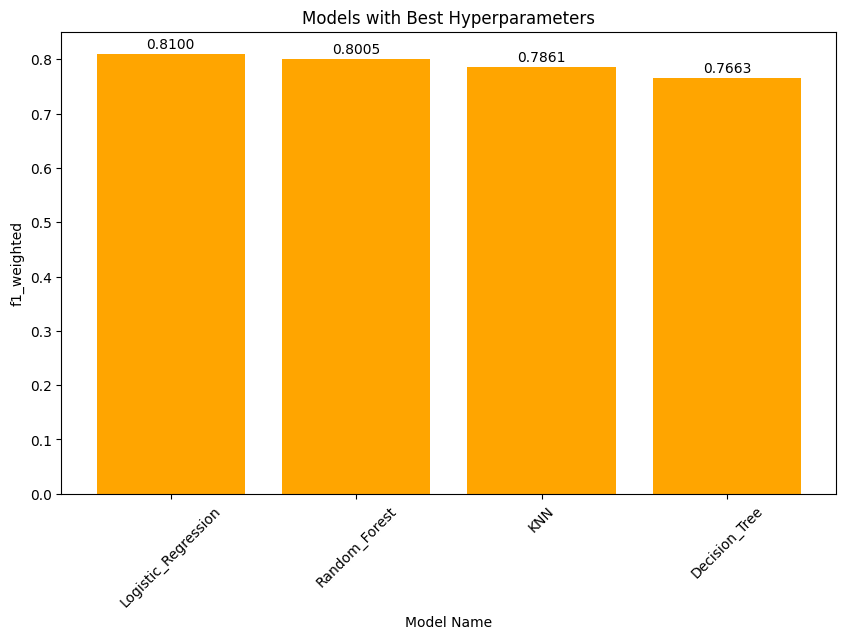

In [140]:
# Get models f1_weighted scores and names
model_names = [model_name for model_name in search_histories.keys()]
model_scores = [search_history['mean_test_f1_weighted'].max() for search_history in search_histories.values()]

# Create a DataFrame to for plot
df_models = pd.DataFrame({'model_name': model_names, 'f1_score': model_scores})
df_models = df_models.sort_values(by='f1_score', ascending=False)


# Create a bar chart
plt.figure(figsize=(10,6))
plt.bar(data=df_models, x='model_name', height='f1_score', color='orange')

# Add text labels to the bars
for i, score in enumerate(df_models['f1_score']):
    plt.text(i, score+0.01, '{:1.4f}'.format(score), ha="center")

plt.xlabel('Model Name')
plt.ylabel('f1_weighted')
plt.title('Models with Best Hyperparameters')
plt.xticks(rotation=45)
plt.show()

In [141]:
metric_before_after_tuning_models = pd.merge(
    metric_table[['model_name', 'f1_score']], 
    df_models, 
    on='model_name', 
    how='inner', 
    suffixes=('_before', '_after')
).sort_values(ascending=False, by='f1_score_after')

metric_before_after_tuning_models

,model_name,f1_score_before,f1_score_after
1,Logistic_Regression,0.774519,0.809979
3,Random_Forest,0.769806,0.800499
2,KNN,0.749630,0.786092
0,Decision_Tree,0.719069,0.766280


- Compare models before and after hyperparameter tuning using f1 score (weighted) metric


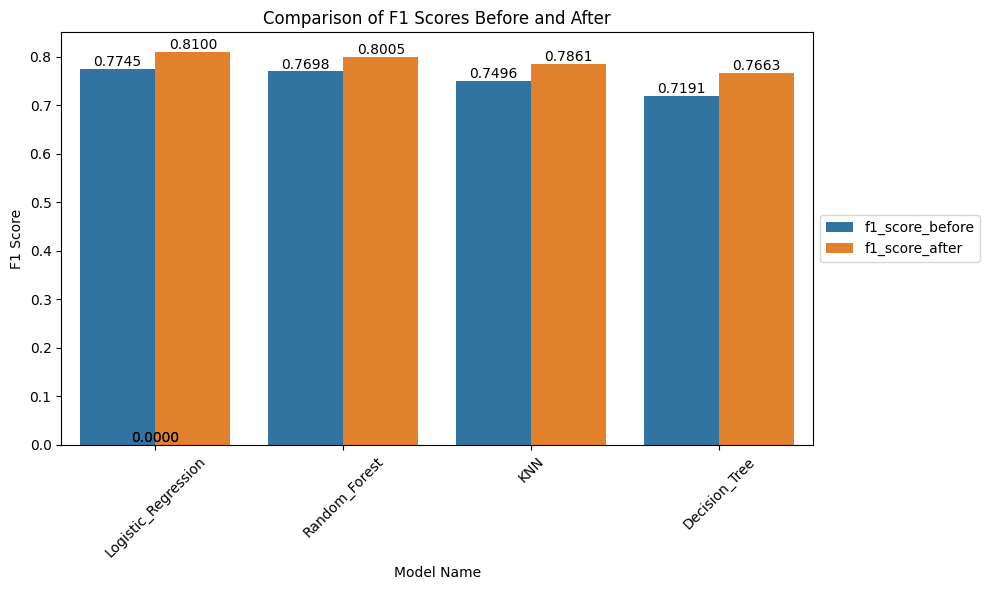

In [142]:
# Melt the DataFrame to combine f1_score_before and f1_score_after into a single column
metric_melted = metric_before_after_tuning_models.melt(id_vars='model_name', var_name='score_type', value_name='f1_score')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the combined data
ax = sns.barplot(data=metric_melted, x='model_name', y='f1_score', hue='score_type')
plt.title('Comparison of F1 Scores Before and After')
plt.xlabel('Model Name')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)

# Annotate the values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
    
# Move legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

- After tuning hyperparameters there was a significant increase in the f1 score. Logistic regression emerged as the best model, followed by Random Forest

In [143]:
# save the best model

best_model_name = df_models['model_name'].iloc[0]
best_model = dict(best_models).get(best_model_name)
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges'], dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encod...
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=300, random_state=42,
                                    solver='liblinear'))])

#### Feature Importance Visualizations


In [144]:
# Get the feature names after transformation
feature_columns = best_model.named_steps['preprocessor'].get_feature_names_out()

# Remove unwanted prefixes and get the last part
feature_columns = np.array([col.split('__')[-1] for col in feature_columns])

# Display the feature columns
pd.DataFrame(feature_columns).rename(columns={0:'feature_columns'})

,feature_columns
0,seniorcitizen
1,tenure
2,monthlycharges
3,totalcharges
4,gender_Female
5,gender_Male
6,partner_No
7,partner_Yes
8,dependents_No
9,dependents_Yes


In [145]:
# Access the coefficients since best model is logistic regression
coefficients = best_model.named_steps['classifier'].coef_[0]

coefficients_df = pd.DataFrame({'Feature': feature_columns, 'Coefficient': coefficients})

# Magnitude of impact
coefficients_df['Absolute Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df.sort_values(by="Absolute Coefficient", ascending=False, inplace=True)

coefficients_df

,Feature,Coefficient,Absolute Coefficient
1,tenure,-2.278496,2.278496
17,internetservice_No,-1.029684,1.029684
3,totalcharges,0.841148,0.841148
38,contract_Two year,-0.792132,0.792132
16,internetservice_Fiber optic,0.756491,0.756491
36,contract_Month-to-month,0.656649,0.656649
2,monthlycharges,0.601522,0.601522
11,phoneservice_Yes,-0.473352,0.473352
29,techsupport_Yes,-0.387767,0.387767
23,onlinebackup_Yes,-0.360061,0.360061


#### Visualizing the feature importance



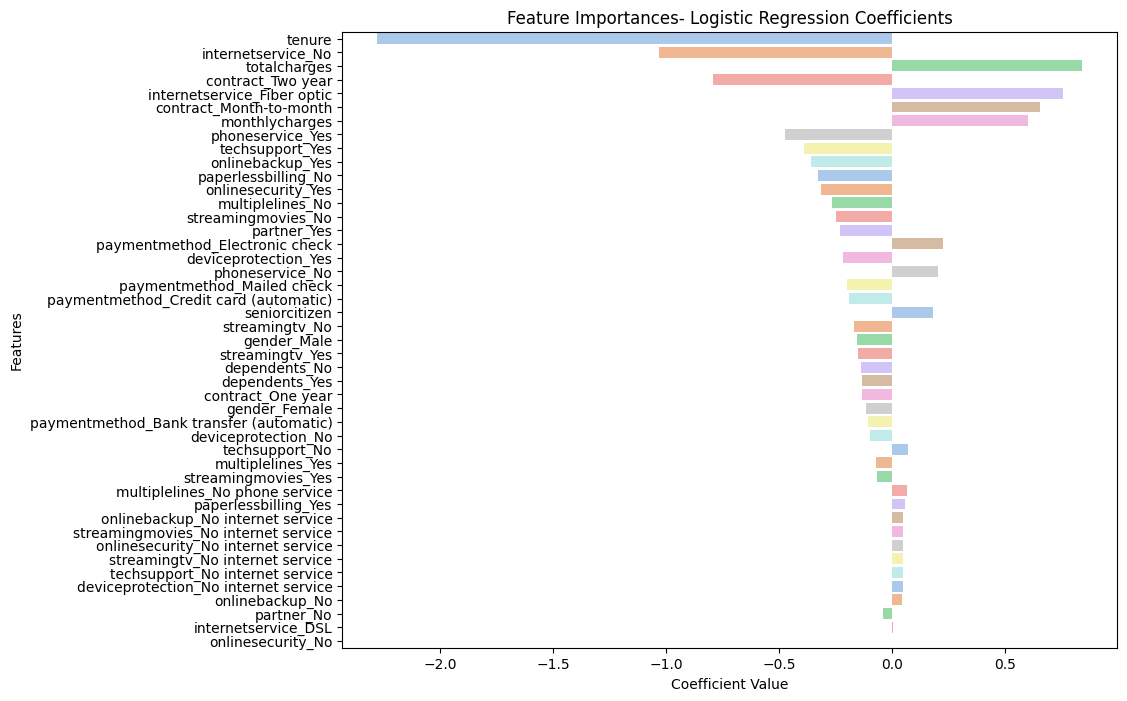

In [146]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='pastel')
plt.title('Feature Importances- Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

#### **Key Insights**

Note: A positive coefficient for a feature indicates that an increase in that feature's value will increase the probability of the target class (customer churn). A negative coefficient for a feature indicates that an increase in that feature's value will decrease the probability of the target class (customer churn). Absolute coefficients are useful for comparing the importance of different features.

1. Tenure:

- Most significant negative impact on the outcome (-2.27).
- Interpretation: Longer tenure reduces the likelihood of the predicted outcome, suggesting that longer-term customers are more stable

2. Internet Service_Fiber optic: 

- Customers with fiber optic internet service are more likely to churn. As the presence of fiber optic increases, the log-odds of churn increase by approximately 0.76.

3. Totalcharges: 

- As totalcharges increase, the log-odds of churn increase by approximately 0.84.

4. Contract type:

- Customers with a month-to-month contract are more likely to churn. As the contract type becomes month-to-month, the log-odds of churn increase by approximately 0.66.

5. Paperlessbilling_No: 

- Customers who use paperless billing are less likely to churn. As the use of paperless billing decreases, the log-odds of churn decrease by approximately 0.33.

#### **Evaluate the best model on the evaluation set**


In [147]:
y_test_pred = best_model.predict(X_test)
print(f'Classification report of the best model- {best_model_name}\n\n{classification_report(y_true=y_test_encoded, y_pred=y_test_pred)}')

Classification report of the best model- Logistic_Regression

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1112
           1       0.58      0.54      0.56       401

    accuracy                           0.78      1513
   macro avg       0.71      0.70      0.71      1513
weighted avg       0.77      0.78      0.77      1513



#### **Prepare the test dataset**

### Test the model

In [148]:
test_data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8


- change column names to small caps to match training data

In [149]:
# Function to change headers to lowercase
def data_columns_lower(data):
    data.columns = data.columns.str.lower()
    return data

# Change training data columns to lowercase
data_columns_lower(test_data)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [150]:
# Change 'totacharges' to numeric type
test_data['totalcharges'] = pd.to_numeric(test_data['totalcharges'], errors = 'coerce')

In [151]:
model_predictions = logistic_reg_pipeline.predict(test_data)
model_predictions

array([1, 0, 0, ..., 1, 0, 0])

In [152]:
# Create an array of corresponding labels
labels = np.array(['No', 'Yes']) # Index 0 is No, 1 is Yes
test_data['model_predictions'] = labels[model_predictions]

In [153]:
# check for 'predicted_churn" column
test_data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,model_predictions
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,No
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,Yes
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes


### **Visualize Predicted Churn**

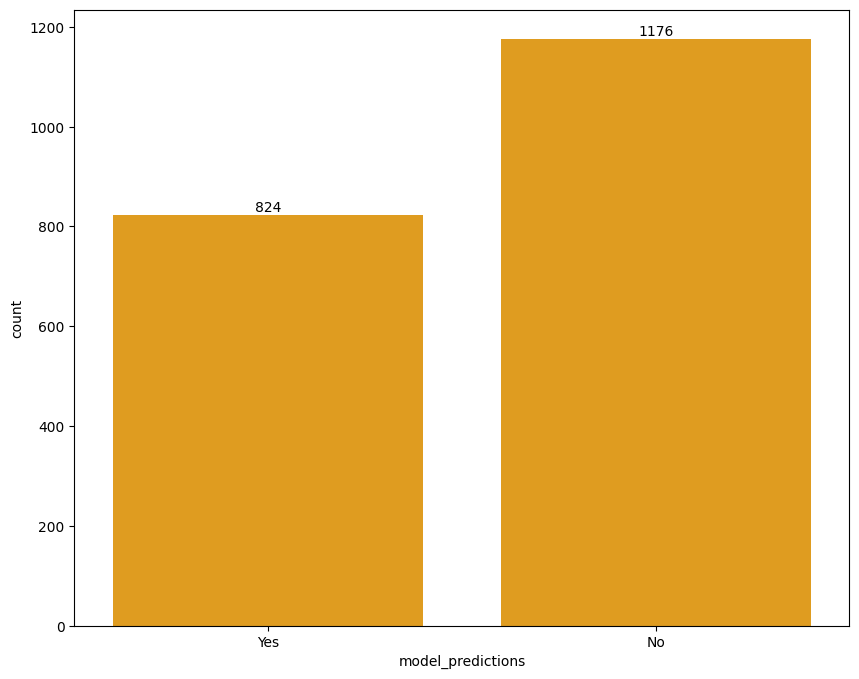

In [154]:
# Create the figure
plt.figure(figsize=(10, 8))

ax=sns.countplot(test_data, x='model_predictions', color='orange')

# Add count values on top of each bar
for p in ax.patches:
    count = int(p.get_height())  # Convert count to integer
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

#### Persit/Save the model

In [156]:
for model_name, pipeline in all_pipelines.items():
    joblib.dump(model_name, f'C:\\Users\\Zawadi\\Desktop\\Azubi\\Customer-Churn-Prediction\\Trained models\\{model_name}.joblib')
    joblib.dump(encoder, f'C:\\Users\\Zawadi\\Desktop\\Azubi\\Customer-Churn-Prediction\\Trained models\\encoder.joblib')
